## **Import libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Input, Flatten, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## **Download the dataset**

Download and extract the dataset from the below link in a folder.

https://drive.google.com/file/d/1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P/view?usp=sharing

In [ ]:
!gdown --id 1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P

!unzip dataset.zip -d dataset

## **Read image files from directory**


In [ ]:
image_size = (64,64)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size = image_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size = image_size
)

## **Display the dataset**

Plot some samples from the dataset to see and know what are you working with. 

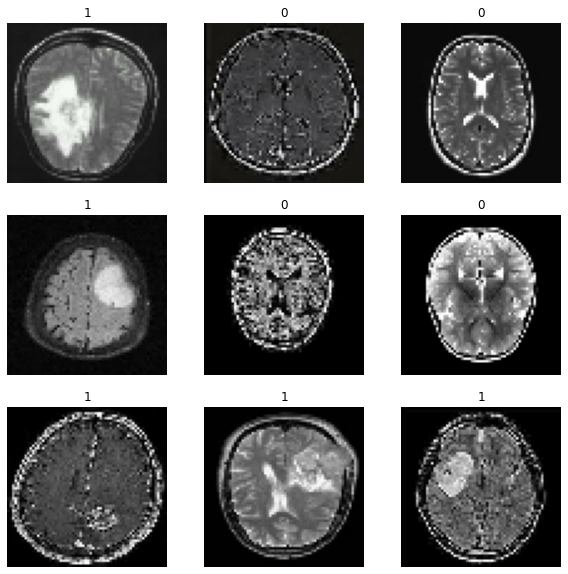

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## **Build the models**

In this section I implemented a model with two approaches. 
First I implemented it with the Sequential API and then I worked with the Functional API in the second part. 

## **1.Sequential API**

### **Build a model**

In [ ]:
seq_model = Sequential()
seq_model.add(Input(shape= (*image_size,3)))
seq_model.add(Rescaling(scale=1./255,offset=-1))
seq_model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
seq_model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
seq_model.add(MaxPool2D())
seq_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
seq_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
seq_model.add(MaxPool2D())
seq_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
seq_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
seq_model.add(MaxPool2D())
seq_model.add(Flatten())
seq_model.add(Dense(units=128,activation='relu'))
seq_model.add(Dense(units=1,activation='sigmoid'))
seq_model.summary()

### **Train the model**

In [6]:
seq_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss',patience=4)]
seq_history =seq_model.fit(train_ds,epochs=20,validation_data=val_ds,callbacks=[callbacks])

### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

In [ ]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 1)
ax.plot(seq_history.history['loss'],label='train')
ax.plot(seq_history.history['val_loss'], label='validation')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')
ax.legend()
ax = plt.subplot(1, 2, 2)
ax.plot(seq_history.history['accuracy'],label='train')
ax.plot(seq_history.history['val_accuracy'], label='validation')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')
ax.legend()
plt.show()

## **2.Functional API**

### **Build a model**

In [ ]:
input_ = Input(shape=(*image_size,3))
x = Rescaling(scale=1./255,offset=-1)(input_)
x = Conv2D(filters=16,kernel_size=(3,3),activation='relu')(x)
x = Conv2D(filters=16,kernel_size=(3,3),activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(filters=32,kernel_size=(3,3),activation='relu')(x)
x = Conv2D(filters=32,kernel_size=(3,3),activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
x = Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
x = MaxPool2D()(x)
x = Flatten()(x)
x = Dense(units=128,activation='relu')(x)
output_ = Dense(units=1,activation='sigmoid')(x)
func_model = Model(inputs=input_,outputs=output_)
func_model.summary()

### **Train the model**

In [15]:
func_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss',patience=4)]
func_history =func_model.fit(train_ds,epochs=20,validation_data=val_ds,callbacks=[callbacks])

### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

In [ ]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 1)
ax.plot(func_history.history['loss'],label='train')
ax.plot(func_history.history['val_loss'], label='validation')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')
ax.legend()
ax = plt.subplot(1, 2, 2)
ax.plot(func_history.history['accuracy'],label='train')
ax.plot(func_history.history['val_accuracy'], label='validation')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')
ax.legend()